<a href="https://colab.research.google.com/github/nikhila-git-check/Coupon-analysis/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('/content/sample_data/Coupon/coupons.csv')


In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
df = pd.DataFrame(data)
df.info()

# Step 1: Check number of missing values in each column
print(df.isnull().sum())



# Step 2: Check percentage of missing values
missing_pct = df.isnull().mean() * 100
print(missing_pct.sort_values(ascending=False))

#Look for duplicate rows
print("Duplicates:", df.duplicated().sum())

# Step 3:  Check for unusual values
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

# Step 4: Look for outliers
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [22]:
# Look at missing data

# 1. Drop 'car' column (too many missing values)
df = df.drop(columns=["car"])

# 2. Drop duplicate rows
df = df.drop_duplicates()

# 3. Impute missing categorical frequency values with mode
for col in ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 4. Double-check missing values are handled
print(df.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


/tmp/ipython-input-1487576249.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


4. What proportion of the total observations chose to accept the coupon?



In [23]:
acceptance_rate = df["Y"].mean()

# Y=1 accepted Y= not accepted
print(f"Acceptance rate: {acceptance_rate:.2%}")

Acceptance rate: 56.76%


5. Use a bar plot to visualize the `coupon` column.

/tmp/ipython-input-3627512939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="coupon", data=df, order=df["coupon"].value_counts().index, palette="Set2")


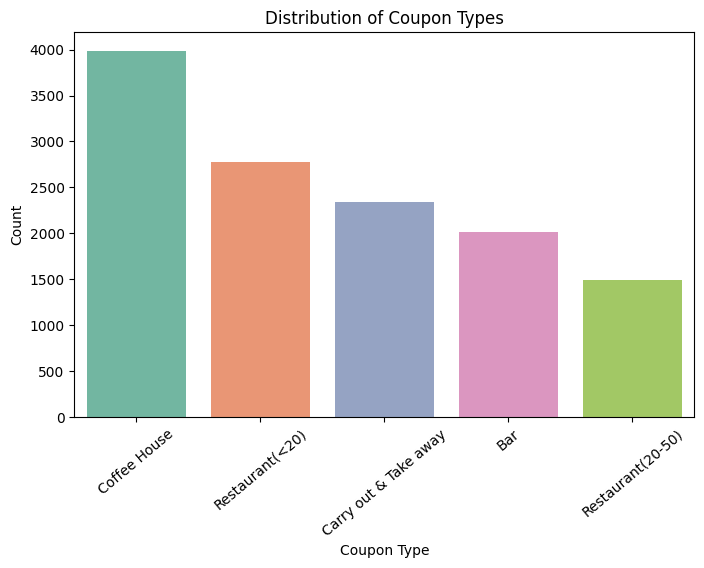

In [25]:
# Countplot of coupon types
plt.figure(figsize=(8,5))
sns.countplot(x="coupon", data=df, order=df["coupon"].value_counts().index, palette="Set2")

plt.title("Distribution of Coupon Types")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=40)
plt.show()

6. Use a histogram to visualize the temperature column.

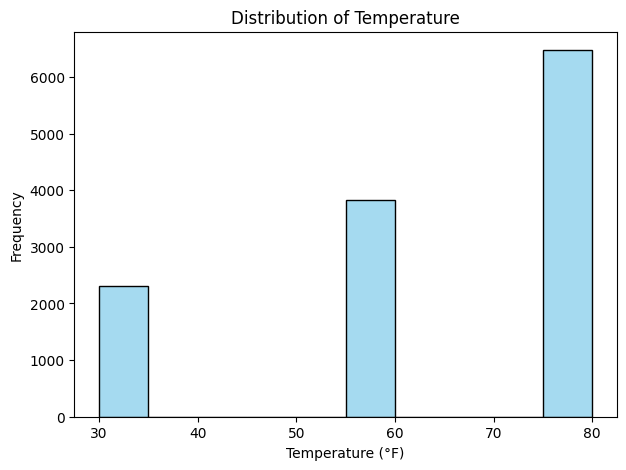

In [27]:
plt.figure(figsize=(7,5))
sns.histplot(df["temperature"], bins=10, kde=False, color="skyblue", edgecolor="black")

plt.title("Distribution of Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-3040934590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="temperature", y="Y", data=acceptance_by_temp, palette="coolwarm")


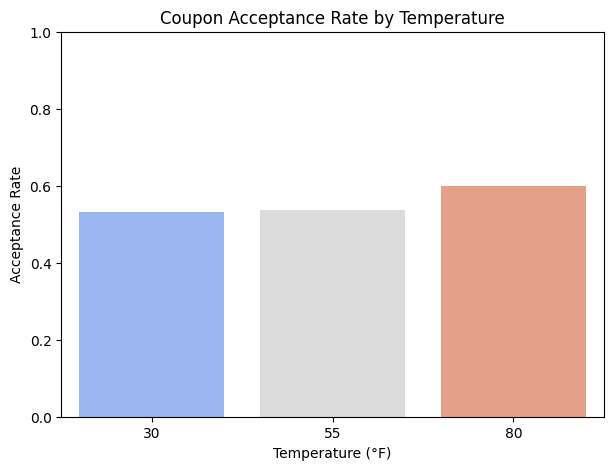

In [28]:
# acceptance rate by temperature
acceptance_by_temp = df.groupby("temperature")["Y"].mean().reset_index()

# Bar plot
plt.figure(figsize=(7,5))
sns.barplot(x="temperature", y="Y", data=acceptance_by_temp, palette="coolwarm")

plt.title("Coupon Acceptance Rate by Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Acceptance Rate")
plt.ylim(0,1)  # show proportion between 0% and 100%
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [29]:
bar_df = df[df["coupon"] == "Bar"].copy()
print(bar_df.shape)
bar_df.head()

(2010, 25)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [30]:
bar_acceptance_rate = bar_df["Y"].mean()
print(f"Bar coupon acceptance : {bar_acceptance_rate:.2%}")

Bar coupon acceptance : 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer
 times a month to those who went more.


In [32]:
#bar went (≤3 times a month) vs frequent bar went (>3 times a month)

#frequenct check
bar_df["bar_visit_group"] = bar_df["Bar"].apply(
    lambda x: "3 or fewer" if x in ["never", "less1", "1~3"] else "more than 3"
)

acceptance_by_group = bar_df.groupby("bar_visit_group")["Y"].mean()
print(acceptance_by_group)

bar_visit_group
3 or fewer     0.370514
more than 3    0.768844
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [33]:
# "below21" and "50plus")
def clean_age(age):
    if age == "below21":
        return 20
    elif age == "50plus":
        return 50
    else:
        return int(age)

bar_df["age_num"] = bar_df["age"].apply(clean_age)

#  groups
bar_df["group"] = bar_df.apply(
    lambda row: "Bar >1 & Age >25"
                if row["Bar"] in ["4~8", "gt8"] and row["age_num"] > 25
                else "Others",
    axis=1
)

# Compare acceptance rates
acceptance_comparison = bar_df.groupby("group")["Y"].mean()
print(acceptance_comparison)

group
Bar >1 & Age >25    0.772059
Others              0.383671
Name: Y, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [36]:
# Define groups based on conditions
bar_df["group2"] = bar_df.apply(
    lambda row: "Bar >1 & Not Kids & Not FFF"
                if (row["Bar"] in ["4~8", "gt8"])
                and (row["passanger"] != "Kids")
                and (row["occupation"] != "Farming Fishing & Forestry")
                else "Others",
    axis=1
)

# Compare acceptance rates
acceptance_comparison2 = bar_df.groupby("group2")["Y"].mean()
print(acceptance_comparison2)

group2
Bar >1 & Not Kids & Not FFF    0.768844
Others                         0.370514
Name: Y, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [38]:
# Clean up age
def clean_age(age):
    if age == "below21":
        return 20
    elif age == "50plus":
        return 50
    else:
        return int(age)

df["age_num"] = df["age"].apply(clean_age)

# Clean up income
def income_to_num(income):
    if income == "Less than $12500":
        return 12500
    elif income == "$12500 - $24999":
        return 25000
    elif income == "$25000 - $37499":
        return 37500
    elif income == "$37500 - $49999":
        return 50000
    elif income == "$50000 - $62499":
        return 62500
    elif income == "$62500 - $74999":
        return 75000
    elif income == "$75000 - $87499":
        return 87500
    elif income == "$87500 - $99999":
        return 100000
    else:  # "$100000 or More"
        return 110000

df["income_num"] = df["income"].apply(income_to_num)

# Define TargetGroup condition
# Drivers who meet below A,B,C will have higher acceptance
df["special_group"] = df.apply(
    lambda row: "TargetGroup"
                if (
                    # Condition A
                    ((row["Bar"] in ["4~8", "gt8"])
                     and (row["passanger"] != "Kid(s)")
                     and (row["maritalStatus"] != "Widowed"))
                    or
                    # Condition B
                    ((row["Bar"] in ["4~8", "gt8"])
                     and (row["age_num"] < 30))
                    or
                    # Condition C
                    ((row["RestaurantLessThan20"] in ["4~8", "gt8"])
                     and (row["income_num"] < 50000))
                )
                else "Others",
    axis=1
)


#  acceptance rates
acceptance_comparison3 = df.groupby("special_group")["Y"].mean()
print(acceptance_comparison3)


special_group
Others         0.559493
TargetGroup    0.597534
Name: Y, dtype: float64


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

According to the analysis, social context and lifestyle have a significant impact on whether or not bar coupons are accepted. Bar coupons are much more likely to be accepted by drivers who attend bars more frequently than those who do not. Drivers with friends or partners were more likely to be accepted, while having children significantly decreases interest in bar offers as Acceptance can be affected by who else is in the car. Moreover, demographics are also significant. younger drivers (under 30) and those who are not widowed show greater responsiveness.Furthermore, drivers with lower salaries who frequently dine at low-cost restaurants show greater acceptance, indicating a budget-friendly approach that makes offers tempting. When analyzed together, these results indicate that bar coupons work best when they are directed at younger, socially engaged, and low-income drivers who are not taking kids on their trips.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  